In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

In [27]:
### Funcao que lê os dados e separa os valores Intensidade e posição
def read_data(file):
    
    df = pd.read_csv(file, delim_whitespace = True)
    
    df['Tempo'] = df['Tempo'].str.replace(',', '.').astype(float)
    df['Intensidade'] = df['Intensidade'].str.replace(',', '.').astype(float)
    
    t = df['Tempo']
    intt = df['Intensidade']
    
    x = [i/50e2 for i in t] # Transforma tempo em posição linear, v= 1/50 cm/s
        
    
    return x, intt, t

In [106]:
file_simples = 'Fendasimples-C.txt'
x_C, intt_C, t_C= read_data(file_simples)


file_simplesD = 'fendasimplesD.txt'
x_fsD, intt_fsD,t_D = read_data(file_simplesD)

fenda_duplaD = 'fendaduplaD (pm).txt'
x_fdD, intt_fdD,t_2C = read_data(fenda_duplaD)

fenda_duplaC = 'fendaduplaC.txt'
x_fdC, intt_fdC,t_2D = read_data(fenda_duplaC)


In [107]:
peaks, _ = find_peaks(intt_C, height=99)

In [108]:
peaks
#1038

array([1004, 1025, 1028, 1031, 1034, 1038, 1040, 1043, 1045, 1049, 1070])

In [109]:
x_C = [i - x_C[1038] for i in x_C]

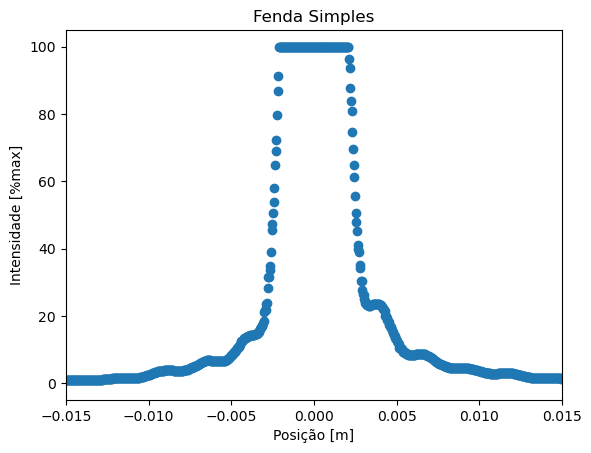

In [123]:
plt.scatter(x_C, intt_C)
#plt.plot(x_C, intt_C, '--')
plt.title('Fenda Simples')
plt.ylabel('Intensidade [%max]')
plt.xlabel('Posição [m]')

plt.xlim(-0.015,0.015)
plt.show()

In [111]:
peaksfsD, _ = find_peaks(intt_fsD, height=99)
peaksfsD

array([ 983, 1017, 1052])

In [112]:
x_fsD = [i - x_fsD[1017] for i in x_fsD]

In [143]:
peaksfsD, _ = find_peaks(intt_fsD, height=10)
peaksfsD

array([ 917,  950,  983, 1017, 1052, 1079, 1081, 1093, 1101, 1109, 1114,
       1118])

In [151]:
x_fsD[1114]

0.0038800000000000015

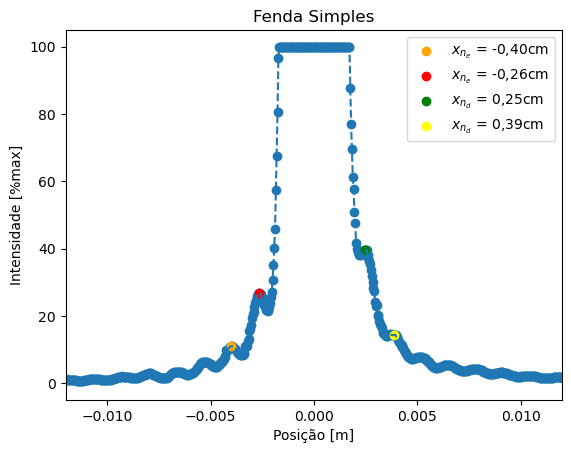

In [194]:
plt.scatter(x_fsD, intt_fsD)
plt.plot(x_fsD, intt_fsD, '--')
plt.title('Fenda Simples')
plt.ylabel('Intensidade [%max]')
plt.xlabel('Posição [m]')


plt.scatter(x_fsD[917],intt_fsD[917], color = 'orange', label = r'$x_{n_e}$ = -0,40cm' )
plt.scatter(x_fsD[950],intt_fsD[950], color = 'red', label = r'$x_{n_e}$ = -0,26cm' )
plt.scatter(x_fsD[1079],intt_fsD[1079], color = 'green', label = r'$x_{n_d}$ = 0,25cm' )
plt.scatter(x_fsD[1114],intt_fsD[1114], color = 'yellow', label = r'$x_{n_d}$ = 0,39cm' )
plt.xlim(-0.012, 0.012)
plt.legend()

plt.savefig('fenda_simples.png',  dpi=300, bbox_inches='tight')
plt.show()

In [208]:
def calcular_d(x_m, D, lamb, n):
    theta = np.arctan(x_m/D)
    d = n*lamb/(x_m/D)
    return np.abs(d)

In [209]:
def inc_d(a_enc, a_esp):
    n = len(a_enc)
    soma = 0
    for i in a_enc:
        soma += np.abs(i - a_esp)
    inc = (1/n)*soma
    return inc

### Fenda Simples $a = 0.08mm$

In [210]:
d_n1 = calcular_d(x_fsD[950], 35e-2, 632.8e-9, 1)
d_n2 = calcular_d(x_fsD[917], 35e-2, 632.8e-9, 2)
d_n1d = calcular_d(x_fsD[1079], 35e-2, 632.8e-9, 1)
d_n2d = calcular_d(x_fsD[1114], 35e-2, 632.8e-9, 2)

In [211]:
print(f'Para máximos a direita: an1 = {d_n1*1e3}\n, an2 ={d_n2*1e3}\n Para máximos à esquerda: \n an1 = {d_n1d*1e3}, \n an2 = {d_n2d*1e3}')

Para máximos a direita: an1 = 0.08264179104477605
, an2 =0.11074000000000009
 Para máximos à esquerda: 
 an1 = 0.08930645161290311, 
 an2 = 0.1141649484536082


In [212]:
d_enc = [d_n1, d_n2, d_n1d, d_n2d]

In [213]:

d_mean = np.mean(d_enc)*1e3 
print(f'd = {d_mean:.4f} mm')

d = 0.0992 mm


In [214]:
incerteza_d = inc_d(d_enc, 0.08e-3)
incerteza_d*1e3

0.019213297777821853

$$
a = (0,09 \pm 0,01)mm
$$

### Fenda Dupla

In [193]:
peaksfdD, _ = find_peaks(intt_fdD, height=20)
peaksfdD

array([ 922,  927,  931,  970,  990,  995, 1021, 1044, 1047, 1050, 1064,
       1103, 1113, 1122, 1131])

In [132]:
x_fdD[970]

-0.0029600000000000043

In [ ]:
peaksfdD, _ = find_peaks(intt_fdD, height=99)
peaksfdD

In [115]:
x_fdD = [i - x_fdD[1044] for i in x_fdD]

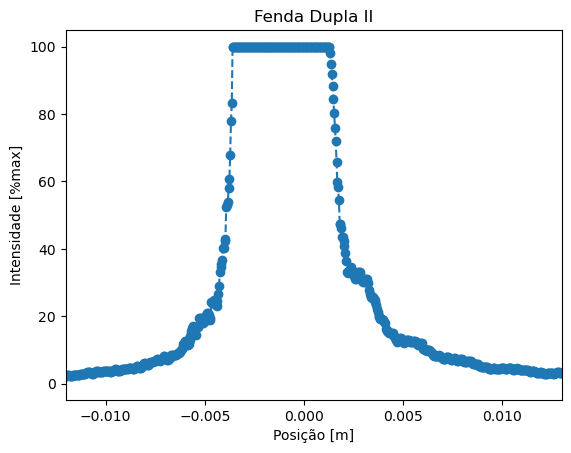

In [222]:
plt.scatter(x_fdD, intt_fdD)
plt.title('Fenda Dupla II')

plt.ylabel('Intensidade [%max]')
plt.xlabel('Posição [m]')
plt.plot(x_fdD, intt_fdD, '--')
plt.xlim(-0.012, 0.013)

plt.savefig('fenda_duplaII.png',  dpi=300, bbox_inches='tight')
plt.show()

In [117]:
peaksfdC, _ = find_peaks(intt_fdC, height=99)
peaksfdC

array([ 994, 1019, 1046])

In [118]:
x_fdC = [i - x_fdC[1019] for i in x_fdC]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


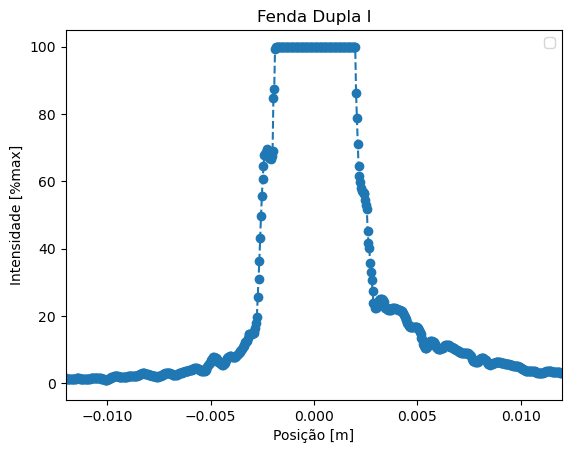

In [221]:
plt.scatter(x_fdC, intt_fdC)
plt.plot(x_fdC, intt_fdC, '--')

plt.ylabel('Intensidade [%max]')
plt.xlabel('Posição [m]')
plt.title('Fenda Dupla I')
plt.xlim(-0.012, 0.012)
plt.legend()

plt.savefig('fenda_duplaI.png',  dpi=300, bbox_inches='tight')
plt.show()

In [206]:
peaks_fd1, _ = find_peaks(intt_fdC, height = 10)
peaks_fd1

array([ 962,  994, 1019, 1046, 1100, 1116, 1142, 1161, 1179])

In [220]:
d_n1 = calcular_d(x_fdC[962], 35e-2, 632.8e-9, 1)
d_n2 = calcular_d(x_fdC[1100], 35e-2, 632.8e-9, 2)
d_n2*1e3

0.13671604938271634

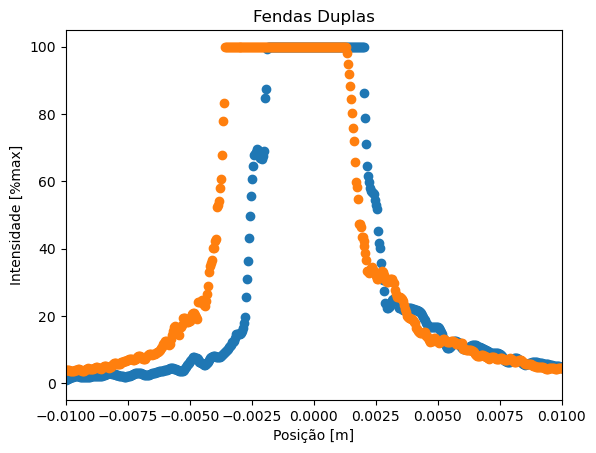

In [223]:
plt.scatter(x_fdC, intt_fdC, label = 'I')
plt.scatter(x_fdD, intt_fdD, label = 'II')
plt.xlim(-0.01, 0.01)
plt.ylabel('Intensidade [%max]')
plt.xlabel('Posição [m]')
plt.title('Fendas Duplas')

plt.savefig('fendas_duplas.png',  dpi=300, bbox_inches='tight')
plt.show()